# AtliQ Grands owns multiple five-star hotels across India. They have been in the hospitality industry for the past 20 years. Due to strategic moves from other competitors and ineffective decision-making in management, AtliQ Grands are losing its market share and revenue in the luxury/business hotels category. As a strategic move, the managing director of AtliQ Grands wanted to incorporate “Business and Data Intelligence” to regain their market share and revenue. However, they do not have an in-house data analytics team to provide them with these insights.

# Problem Statment

Atliq Grands, a hotel chain operating across multiple cities in India, is currently encountering stiff
competition within its segment, resulting in a decline in revenue and market share.To turn things
around, they want to analyze data from May 2022 to June 2022.The primary goal is to utilize
Python's built-in libraries to extract valuable insights from provided datasets, focusing on
aspects such as ratings, realized revenue, occupancy percentage, and other metrics.

# Exploratory Data Analysis

In [710]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium as fo
from geopy.geocoders import Nominatim

In [711]:
dim_date=pd.read_csv('dim_date.csv')
dim_hotels=pd.read_csv('dim_hotels.csv')
dim_rooms=pd.read_csv('dim_rooms.csv')
fact_aggregated_bookings=pd.read_csv('fact_aggregated_bookings.csv')
fact_bookings=pd.read_csv('fact_bookings.csv')
metrics_list=pd.read_excel('metrics_list.xlsx')

Exploring Hotel Dataset

In [712]:
dim_hotels.shape

(25, 4)

In [713]:
dim_hotels.head(5)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [714]:
dim_hotels.category.unique()

array(['Luxury', 'Business'], dtype=object)

In [715]:
dim_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [716]:
# geolocator = Nominatim(user_agent="property_locator")

# # Create a map centered around India
# map_center = [20.5937, 78.9629]                         # Latitude and longitude of India
# m = folium.Map(location=map_center, zoom_start=5)

# for index, row in dim_hotels.iterrows():               # Add markers for each property
#     location = geolocator.geocode(row['city'])
#     if location:
#         popup_text = f"Property Name: {row['property_name']}<br>Category: {row['category']}<br>City: {row['city']}"
#         folium.Marker(
#             location=[location.latitude, location.longitude],
#             popup=popup_text,
#             icon=folium.Icon(color='blue', icon='home')
#         ).add_to(m)

# m

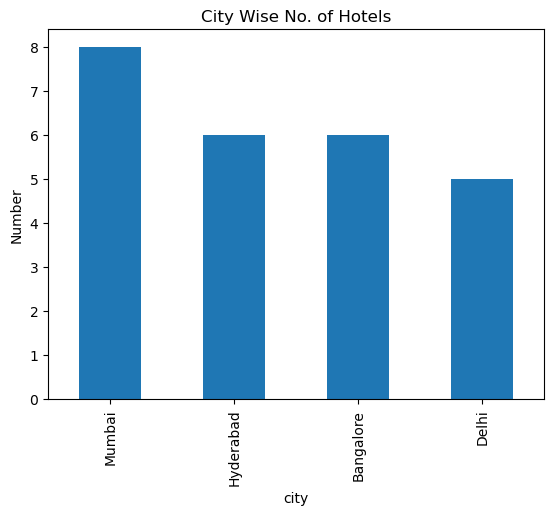

In [717]:
dim_hotels.city.value_counts().plot(kind='bar')
plt.xlabel("city")
plt.ylabel("Number")
plt.title("City Wise No. of Hotels")
plt.show()

Exploring Booking Dataset

In [718]:
fact_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [719]:
fact_bookings.room_category.value_counts()          #Category wise no. of bookings

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

In [720]:
fact_bookings.room_category.unique()                   #Category of all rooms

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [721]:
import plotly.graph_objects as go

booking_platform_counts = fact_bookings['booking_platform'].value_counts().sort_values(ascending=False)
fig = go.Figure([go.Bar(x=booking_platform_counts.index, y=booking_platform_counts.values)])

fig.update_layout(
    xaxis=dict(title='Booking Platform'),
    yaxis=dict(title='Number of Bookings'),
    title='Hotel Booking Platform wise no. of bookings')

fig.show()


Exploaring fact aggregated Booking Dataset

In [722]:
fact_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [723]:
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'], format='%d-%b-%y')
fact_aggregated_bookings['months'] = fact_aggregated_bookings['check_in_date'].dt.month_name()
fact_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,months
0,16559,2022-05-01,RT1,25,30,May
1,19562,2022-05-01,RT1,28,30,May
2,19563,2022-05-01,RT1,23,30,May
3,17558,2022-05-01,RT1,13,19,May
4,16558,2022-05-01,RT1,18,19,May


In [724]:
fact_aggregated_bookings.groupby(fact_aggregated_bookings.check_in_date.dt.month)['successful_bookings'].sum()    #No. of Booking per Month

check_in_date
5    45882
6    43683
7    45025
Name: successful_bookings, dtype: int64

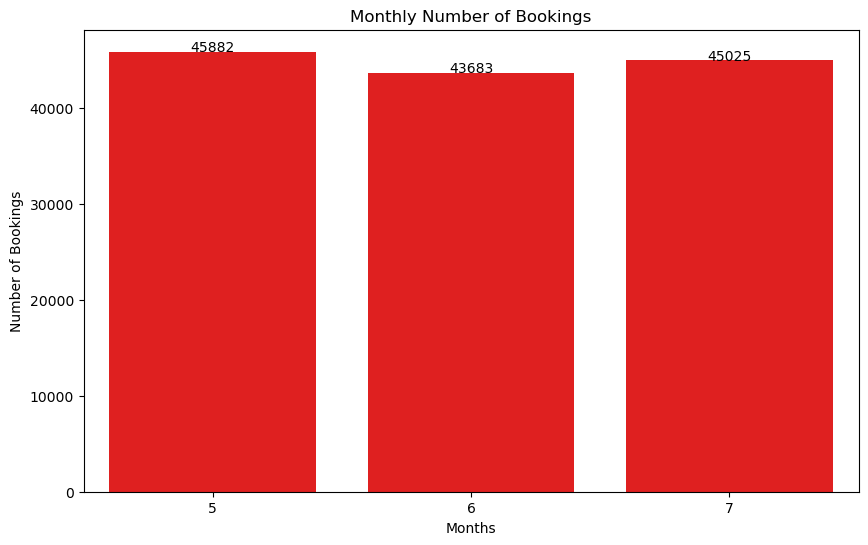

In [725]:
monthly_bookings = fact_aggregated_bookings.groupby(fact_aggregated_bookings['check_in_date'].dt.month)['successful_bookings'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='check_in_date', y='successful_bookings', data=monthly_bookings, color='red')

for index, row in monthly_bookings.iterrows():               # Add annotations to each bar
    plt.text(row.name, row['successful_bookings'], str(row['successful_bookings']), color='black', ha="center")

plt.xlabel('Months')
plt.ylabel('Number of Bookings')
plt.title('Monthly Number of Bookings')
plt.show()

In [726]:
propert_c=fact_aggregated_bookings.groupby('property_id')     #Propert Id wise count no.of Bookings
propert_c['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7147
17558    5036
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

# Data Transformation

Create Occupancy Percentage Column

In [727]:
fact_aggregated_bookings['Occupancy%'] = fact_aggregated_bookings['successful_bookings']/fact_aggregated_bookings['capacity']*100

In [728]:
fact_aggregated_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,months,Occupancy%
0,16559,2022-05-01,RT1,25,30,May,83.333333
1,19562,2022-05-01,RT1,28,30,May,93.333333
2,19563,2022-05-01,RT1,23,30,May,76.666667
3,17558,2022-05-01,RT1,13,19,May,68.421053
4,16558,2022-05-01,RT1,18,19,May,94.736842


# Insight Generation

Average Occupancy rate in each of the room categories:

In [729]:
occupancy = fact_aggregated_bookings.groupby('room_category')['Occupancy%'].mean()

In [730]:
occupancy

room_category
RT1    57.918990
RT2    58.007904
RT3    58.028291
RT4    59.278422
Name: Occupancy%, dtype: float64

In [731]:
pd.merge(dim_rooms,occupancy,left_on='room_id',right_on='room_category')

,room_id,room_class,Occupancy%
0,RT1,Standard,57.918990
1,RT2,Elite,58.007904
2,RT3,Premium,58.028291
3,RT4,Presidential,59.278422


Average Occupancy Rate per city

In [732]:
occ_city=pd.merge(fact_aggregated_bookings,dim_hotels,on = 'property_id')     #join both DataFrame

In [733]:
occ_city.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,months,Occupancy%,property_name,category,city
0,16559,2022-05-01,RT1,25,30,May,83.333333,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-01,RT2,35,41,May,85.365854,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-01,RT3,27,32,May,84.375000,Atliq Exotica,Luxury,Mumbai
3,16559,2022-05-01,RT4,17,18,May,94.444444,Atliq Exotica,Luxury,Mumbai
4,16559,2022-05-02,RT1,20,30,May,66.666667,Atliq Exotica,Luxury,Mumbai


In [734]:
occ_city.groupby('city')['Occupancy%'].mean().round(3)

city
Bangalore    56.341
Delhi        61.521
Hyderabad    58.122
Mumbai       57.916
Name: Occupancy%, dtype: float64

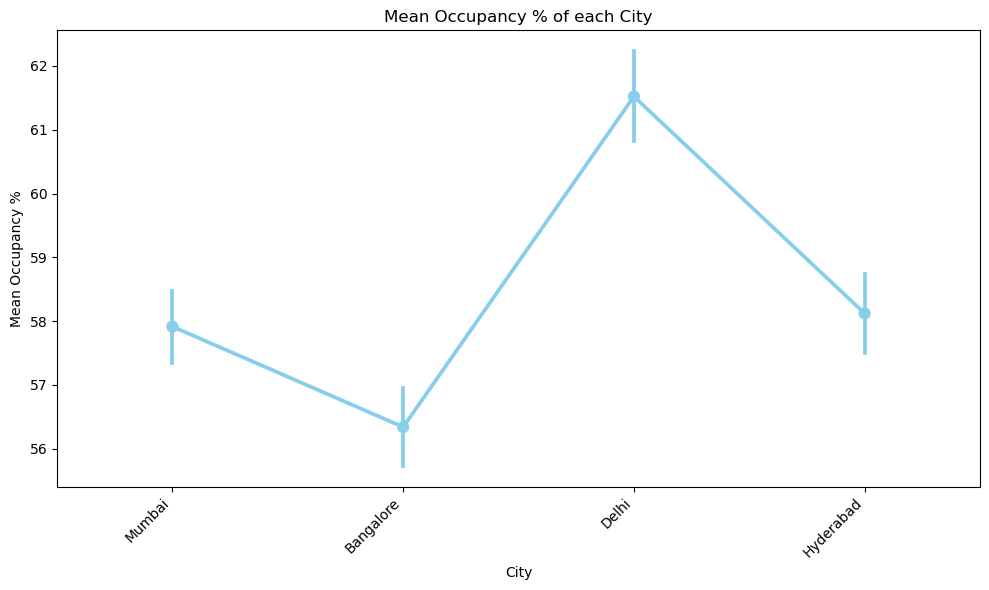

In [735]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='city', y='Occupancy%', data=occ_city, color='skyblue')
plt.xlabel('City')
plt.ylabel('Mean Occupancy %')
plt.title('Mean Occupancy % of each City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


When was the ocuupancy are much? Weekday or Weekend?

In [736]:
dim_date['date'] = pd.to_datetime(dim_date['date'])
occ_wee = pd.merge(occ_city,dim_date,left_on = 'check_in_date', right_on = 'date')

C:\Users\jasmi\AppData\Local\Temp\ipykernel_23948\1574251179.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [737]:
occ_wee.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,months,Occupancy%,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30,May,83.333333,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,16559,2022-05-01,RT2,35,41,May,85.365854,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
2,16559,2022-05-01,RT3,27,32,May,84.375000,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
3,16559,2022-05-01,RT4,17,18,May,94.444444,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
4,19562,2022-05-01,RT1,28,30,May,93.333333,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend


In [738]:
pie_occ_wee=occ_wee.groupby('day_type')['Occupancy%'].mean().round(3)
pie_occ_wee

day_type
weekeday    51.807
weekend     73.960
Name: Occupancy%, dtype: float64

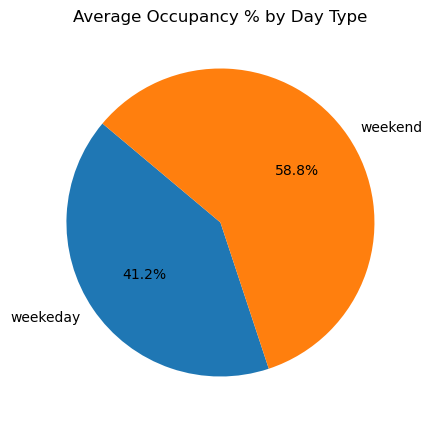

In [739]:
occupancy_mean = occ_wee.groupby('day_type')['Occupancy%'].mean().round(3)

plt.figure(figsize=(8,5))
plt.pie(occupancy_mean, labels=occupancy_mean.index, autopct='%1.1f%%', startangle=140)

plt.title('Average Occupancy % by Day Type')
plt.show()


In the month of June,What is the occupancy for diffierent cities

In [740]:
df_June =occ_wee[occ_wee['check_in_date'] == '2022-06']

In [741]:
df_June.sample(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,months,Occupancy%,property_name,category,city,date,mmm yy,week no,day_type
3176,18562,2022-06-01,RT1,20,38,June,52.631579,Atliq Bay,Luxury,Hyderabad,2022-06-01,Jun 22,W 23,weekeday
3137,16560,2022-06-01,RT2,14,34,June,41.176471,Atliq City,Business,Delhi,2022-06-01,Jun 22,W 23,weekeday
3134,17561,2022-06-01,RT3,9,19,June,47.368421,Atliq Blu,Luxury,Mumbai,2022-06-01,Jun 22,W 23,weekeday
3107,19562,2022-06-01,RT4,7,14,June,50.000000,Atliq Bay,Luxury,Bangalore,2022-06-01,Jun 22,W 23,weekeday
3154,17559,2022-06-01,RT3,7,16,June,43.750000,Atliq Exotica,Luxury,Mumbai,2022-06-01,Jun 22,W 23,weekeday


In [742]:
df_June.groupby('city')['Occupancy%'].mean().round(2)

city
Bangalore    44.09
Delhi        49.72
Hyderabad    45.27
Mumbai       43.67
Name: Occupancy%, dtype: float64

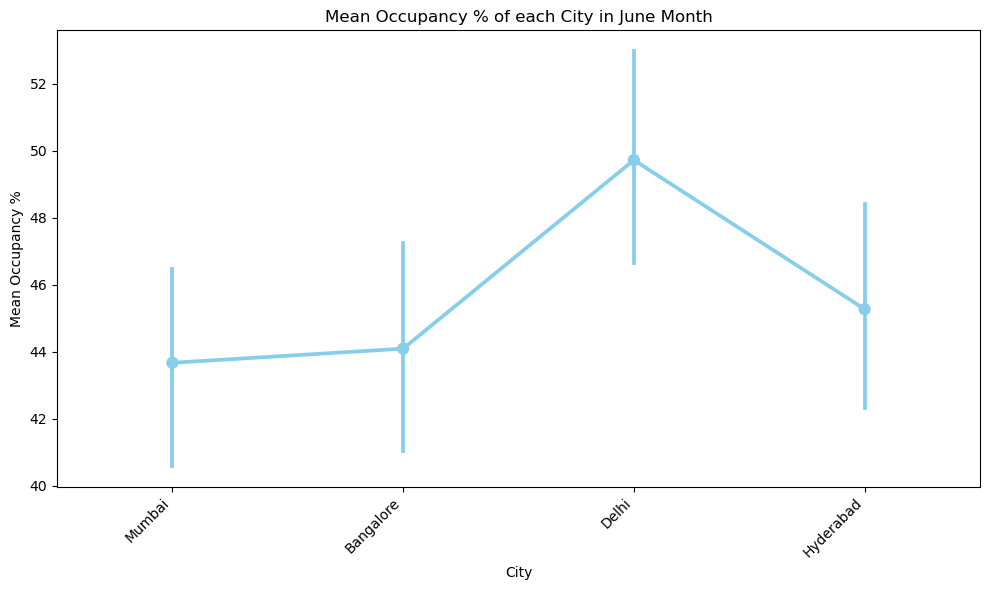

In [743]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='city', y='Occupancy%', data=df_June, color='skyblue')
plt.xlabel('City')
plt.ylabel('Mean Occupancy %')
plt.title('Mean Occupancy % of each City in June Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [744]:
dff_june=df_June.groupby('city')['Occupancy%'].mean().round(2).reset_index()
dff_june

,city,Occupancy%
0,Bangalore,44.09
1,Delhi,49.72
2,Hyderabad,45.27
3,Mumbai,43.67


In [745]:
df_may =occ_wee[occ_wee['check_in_date'] == '2022-05']
dff__may=df_may.groupby('city')['Occupancy%'].mean().round(2).reset_index()
dff__may

,city,Occupancy%
0,Bangalore,77.59
1,Delhi,85.86
2,Hyderabad,79.72
3,Mumbai,76.42


How Many Percentage Booking are Reduce may to June Monthe in?

In [746]:
reduce_booking= dff_june['Occupancy%'] - dff__may['Occupancy%'] 
reduce_booking

0   -33.50
1   -36.14
2   -34.45
3   -32.75
Name: Occupancy%, dtype: float64

How many Revenue generate per city?

In [747]:
revenue = pd.merge(fact_bookings,dim_hotels, on = 'property_id')
revenue.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [748]:
revenue.groupby('city')['revenue_realized'].sum()

city
Bangalore    420397050
Delhi        294500318
Hyderabad    325232870
Mumbai       668640991
Name: revenue_realized, dtype: int64

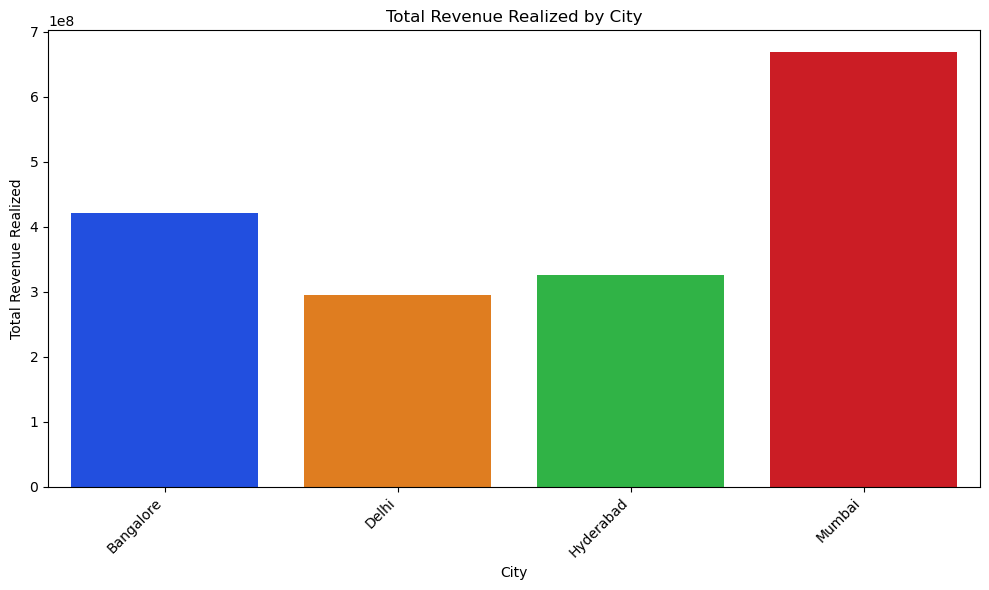

In [749]:
revenue_sum = revenue.groupby('city')['revenue_realized'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='revenue_realized', data=revenue_sum, palette='bright')
plt.xlabel('City')
plt.ylabel('Total Revenue Realized')
plt.title('Total Revenue Realized by City')
plt.xticks(rotation=45, ha='right')                 # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


How many Month by Month Revenue?

In [750]:
revenue['check_in_date'] = pd.to_datetime(revenue['check_in_date'])
revenue.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi


In [751]:
dim_date['date'] = pd.to_datetime(dim_date['date'])
dim_date.head(5)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [752]:
df_revenue = pd.merge(revenue,dim_date,left_on = 'check_in_date' , right_on = 'date')
df_revenue.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [753]:
df_revenue.groupby('mmm yy')['revenue_realized'].sum().reset_index()

,mmm yy,revenue_realized
0,Jul 22,572908208
1,Jun 22,553932355
2,May 22,581930666


Index(['mmm yy', 'revenue_realized'], dtype='object')


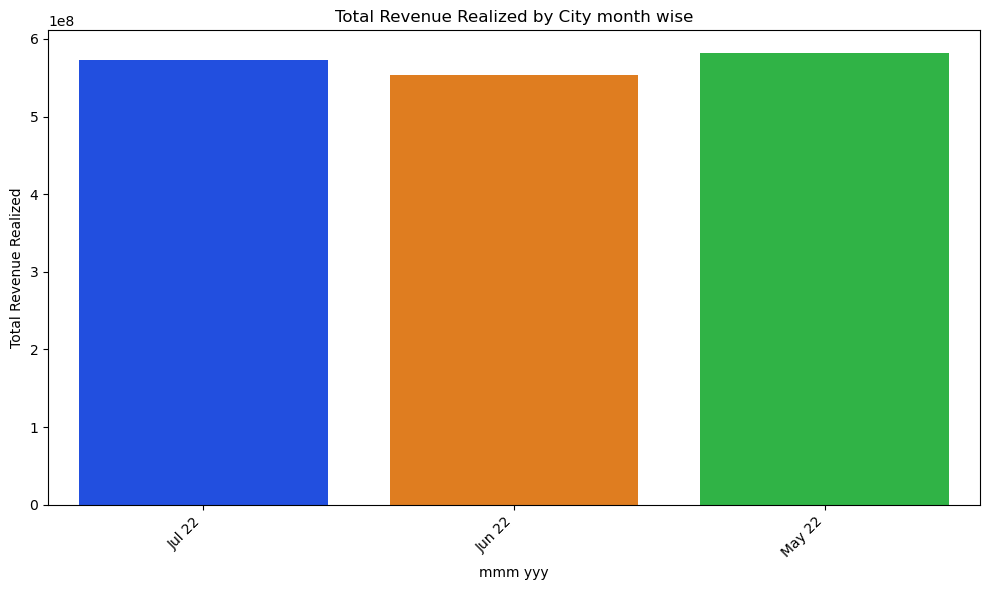

In [754]:
revenue_sum_month = df_revenue.groupby('mmm yy')['revenue_realized'].sum().reset_index()
print(revenue_sum_month.columns)

plt.figure(figsize=(10, 6))
sns.barplot(x='mmm yy', y='revenue_realized', data=revenue_sum_month, palette='bright')
plt.xlabel('mmm yyy')
plt.ylabel('Total Revenue Realized')
plt.title('Total Revenue Realized by City month wise')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


How many Revenue Realized per hotel type?

In [755]:
df_revenue.groupby('property_name')['revenue_realized'].sum()

property_name
Atliq Bay        260051178
Atliq Blu        260855522
Atliq City       285811939
Atliq Exotica    320312468
Atliq Grands     211532764
Atliq Palace     304081863
Atliq Seasons     66125495
Name: revenue_realized, dtype: int64

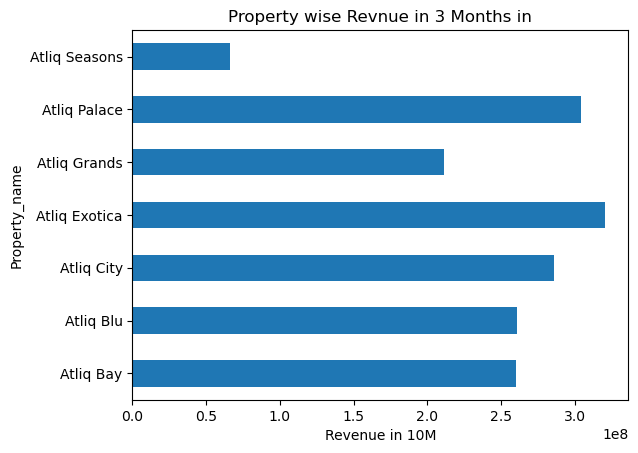

In [756]:
df_revenue.groupby('property_name')['revenue_realized'].sum().plot(kind = 'barh')
plt.xlabel('Revenue in 10M')
plt.ylabel('Property_name')
plt.title('Property wise Revnue in 3 Months in')
plt.show()

Room Category wise Revenue Generate?

In [757]:
fact_book=fact_bookings.groupby('room_category')['revenue_realized'].sum().reset_index()
fact_book

,room_category,revenue_realized
0,RT1,309580895
1,RT2,560271204
2,RT3,462166344
3,RT4,376752786


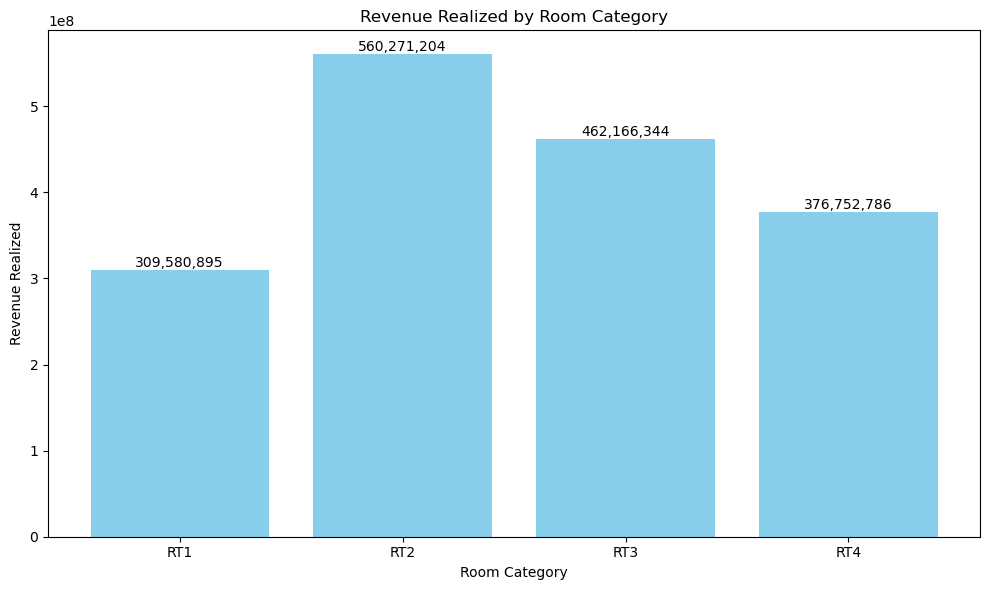

In [758]:
room_category = fact_book['room_category']
revenue_realized = fact_book['revenue_realized']

plt.figure(figsize=(10, 6))
plt.bar(room_category, revenue_realized, color='skyblue')

for i in range(len(room_category)):
    plt.text(i, revenue_realized[i], f"{revenue_realized[i]:,}", ha='center', va='bottom')

plt.xlabel('Room Category')
plt.ylabel('Revenue Realized')
plt.title('Revenue Realized by Room Category')
plt.tight_layout()
plt.show()


How many revenue realized per booking platform?

In [759]:
revenue_plat = df_revenue.groupby('booking_platform')['revenue_realized'].sum()
revenue_plat

booking_platform
direct offline     86404333
direct online     169026467
journey           102531334
logtrip           187554488
makeyourtrip      340834504
others            699353302
tripster          123066801
Name: revenue_realized, dtype: int64

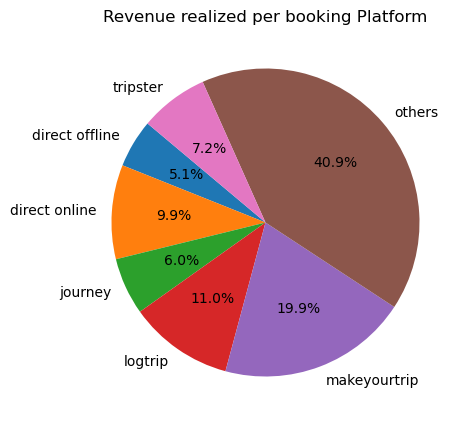

In [760]:
plt.figure(figsize=(8,5))
plt.pie(revenue_plat, labels=revenue_plat.index, autopct='%1.1f%%', startangle=140)

plt.title('Revenue realized per booking Platform')
plt.show()


Average Rating per City?

In [761]:
df_revenue.groupby('city')['ratings_given'].mean().round(3)

city
Bangalore    3.408
Delhi        3.779
Hyderabad    3.661
Mumbai       3.650
Name: ratings_given, dtype: float64

How many booking are Canceled and which Category in?

In [762]:
mer = pd.merge(dim_hotels,fact_bookings,on = 'property_id')

In [763]:
cancel_book=mer[mer['booking_status']=='Cancelled']

In [764]:
cancel_book.head(5)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
3,16558,Atliq Grands,Luxury,Delhi,May012216558RT14,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
6,16558,Atliq Grands,Luxury,Delhi,May012216558RT17,2022-04-28,2022-05-01,2022-05-06,2,RT1,others,NaN,Cancelled,9100,3640
13,16558,Atliq Grands,Luxury,Delhi,May012216558RT114,2022-04-30,2022-05-01,2022-05-05,1,RT1,logtrip,NaN,Cancelled,9100,3640
21,16558,Atliq Grands,Luxury,Delhi,May012216558RT24,2022-04-29,2022-05-01,2022-05-03,3,RT2,others,NaN,Cancelled,13860,5544


In [765]:
cancel_book.groupby('booking_status')['category'].value_counts()

booking_status  category
Cancelled       Luxury      20673
                Business    12747
Name: count, dtype: int64

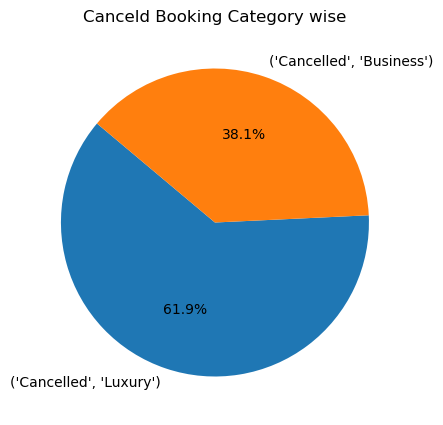

In [766]:
cancel_booking = cancel_book.groupby('booking_status')['category'].value_counts()
plt.figure(figsize=(8,5))
plt.pie(cancel_booking, labels=cancel_booking.index, autopct='%1.1f%%', startangle=140)

plt.title('Canceld Booking Category wise')
plt.show()
